# Purpose and Scope of The EDA


In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
from scipy import stats 
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv('automobile.txt')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
# Check the columns in Dataset so that we know the type of Data we can expect
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
# Display the summarry of the Dataset
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Data Cleaning and Preparation

In [5]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:26]


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
# replace "?" with NaN
df.replace("?", float("nan"), inplace=True)

# convert price column to numeric data type
df["price"] = pd.to_numeric(df["price"])

# drop rows with NaN values in price column
df.dropna(subset=["price"], inplace=True)

# print the min and max price
print("Minimum price:", df["price"].min())
print("Maximum price:", df["price"].max())

Minimum price: 5118.0
Maximum price: 45400.0


In [7]:
# check for duplicates
duplicate_rows = df.duplicated()
print(duplicate_rows)

# count the number of duplicates
print(duplicate_rows.sum())

# remove duplicates
df.drop_duplicates(inplace=True)

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 201, dtype: bool
0


In [8]:
# We find out that the is ? in the normalized-losses column
# We will drop this column as it is irrelavant for our analysis
#df.drop(["normalized-losses"],axis = 1, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [10]:
# Drop the following columns
df.drop(["symboling","normalized-losses", "aspiration","num-of-doors","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm"],axis = 1, inplace = True)

# Data Analysis and Visualisation

In [11]:
df

,make,fuel-type,body-style,engine-size,city-mpg,highway-mpg,price
0,alfa-romero,gas,convertible,130,21,27,13495.0
1,alfa-romero,gas,convertible,130,21,27,16500.0
2,alfa-romero,gas,hatchback,152,19,26,16500.0
3,audi,gas,sedan,109,24,30,13950.0
4,audi,gas,sedan,136,18,22,17450.0
...,...,...,...,...,...,...,...
200,volvo,gas,sedan,141,23,28,16845.0
201,volvo,gas,sedan,141,19,25,19045.0
202,volvo,gas,sedan,173,18,23,21485.0
203,volvo,diesel,sedan,145,26,27,22470.0


#  1. Univeriate Analysis

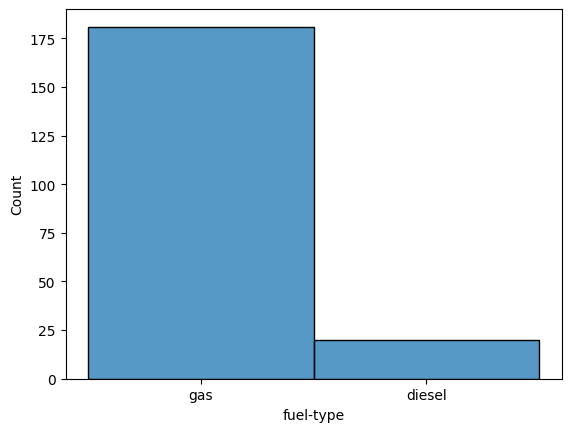

In [12]:
sns.histplot(data=df, x='fuel-type')
plt.show()

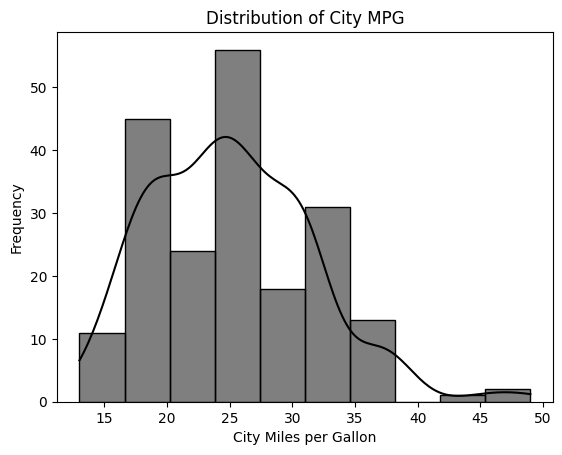

In [13]:
# create histogram for city-mpg
sns.histplot(data=df, x='city-mpg', kde=True, color="black")
plt.title('Distribution of City MPG')
plt.xlabel('City Miles per Gallon')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of City MPG')

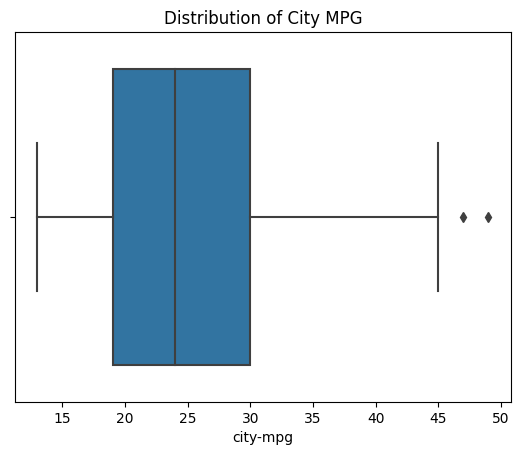

In [14]:
# Plot a Boxplot for City-mpg
sns.boxplot(data=df, x='city-mpg')
plt.title('Distribution of City MPG')

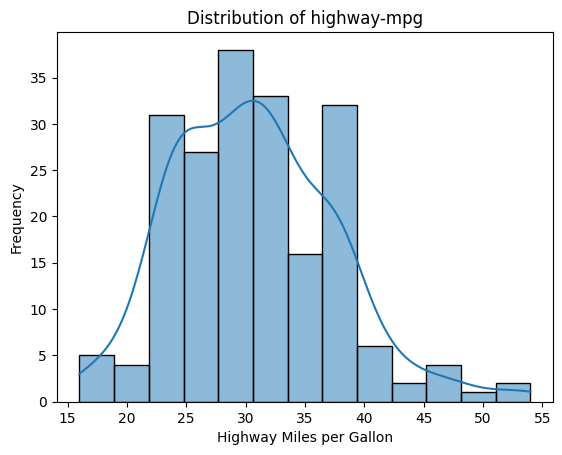

In [15]:
# create histogram for highway-mpg
sns.histplot(data=df, x='highway-mpg', kde=True)
plt.title('Distribution of highway-mpg')
plt.xlabel('Highway Miles per Gallon')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of highway-mpg')

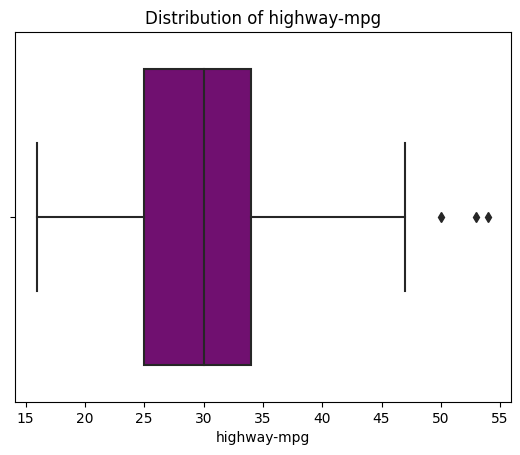

In [16]:
# Plot a Boxplot for highway-mpg
sns.boxplot(data=df, x='highway-mpg', color='purple')
plt.title('Distribution of highway-mpg')

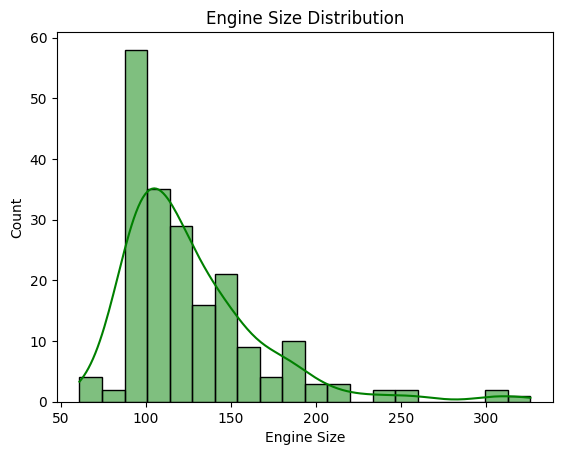

In [17]:
# Create a histogram using Seaborn
sns.histplot(data=df, x="engine-size", bins=20, kde=True, color="green")
plt.title("Engine Size Distribution")
plt.xlabel("Engine Size")
plt.ylabel("Count")
plt.show()

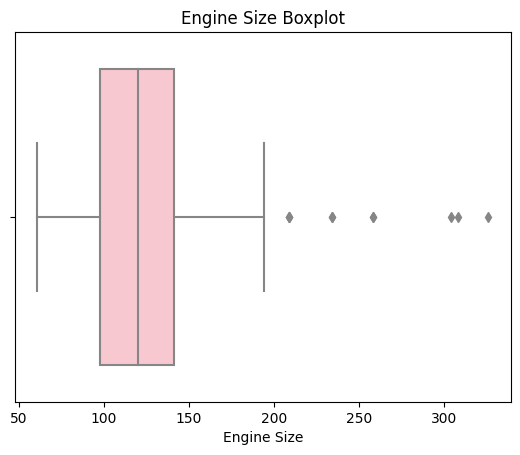

In [18]:
# Create a boxplot using Seaborn
sns.boxplot(x=df["engine-size"], color='pink')
plt.title("Engine Size Boxplot")
plt.xlabel("Engine Size")
plt.show()

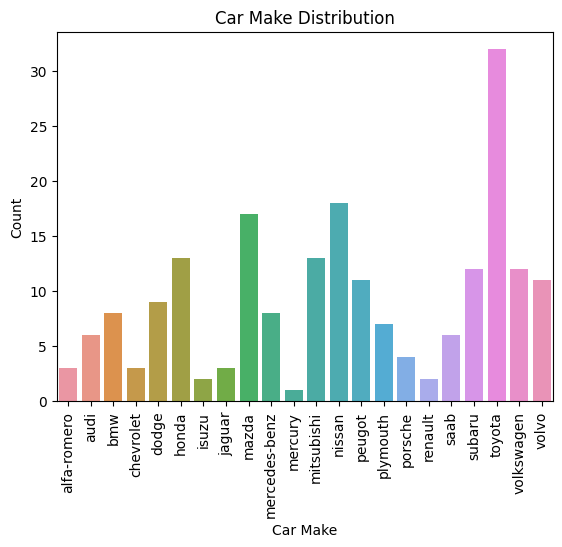

In [19]:
# Create a count plot for Car Make
sns.countplot(data=df, x="make")
plt.title("Car Make Distribution")
plt.xlabel("Car Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

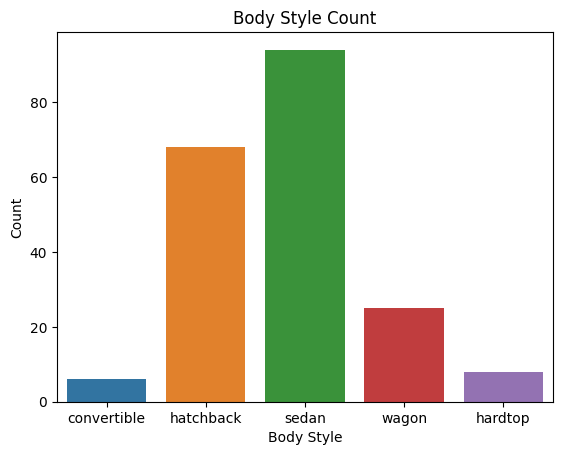

In [20]:
# create a count plot for Body style 
sns.countplot(data=df, x='body-style')
plt.title('Body Style Count')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

# 2. Bivariate Analysis

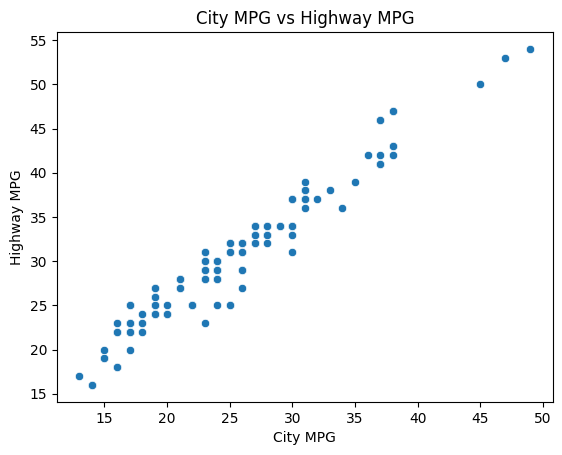

In [21]:
# Plot a scatterplot of city mpg vs highway mpg
sns.scatterplot(x='city-mpg', y='highway-mpg', data=df)
plt.title('City MPG vs Highway MPG')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.show()



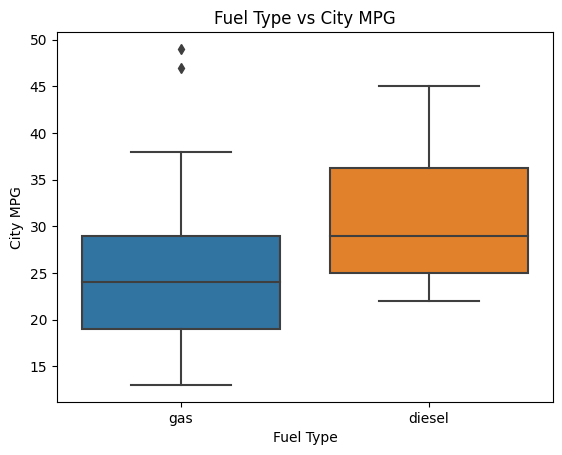

In [22]:
# Create a boxplot for City vs Fuel Type 
sns.boxplot(data=df, x="fuel-type", y="city-mpg")
plt.title("Fuel Type vs City MPG")
plt.xlabel("Fuel Type")
plt.ylabel("City MPG")
plt.show()


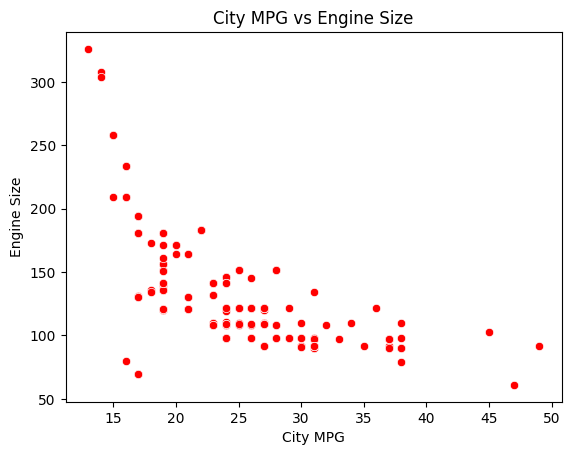

In [23]:
# Create a scatterplot for City MPG vs Engine Size
sns.scatterplot(data=df, x="city-mpg", y="engine-size", color ="red")
plt.title("City MPG vs Engine Size")
plt.xlabel("City MPG")
plt.ylabel("Engine Size")
plt.show()


In [24]:
# Check for the correlation coefficient
corr_coeff = df["city-mpg"].corr(df["engine-size"])

print(corr_coeff)

-0.6505459759740394


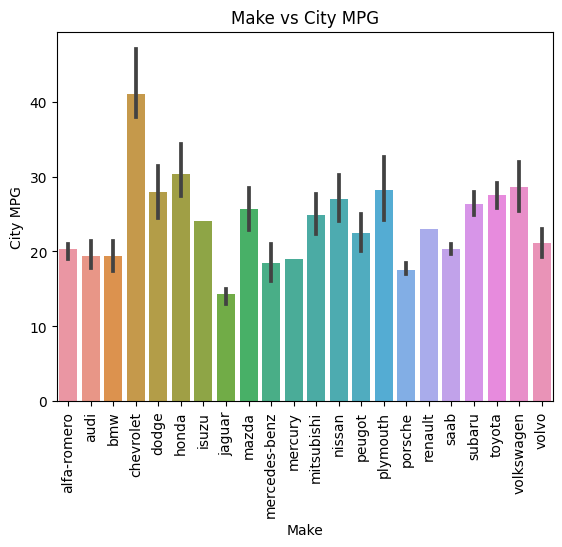

In [25]:
# Create a Barplot for Make Vs City MPG
sns.barplot(data=df, x="make", y="city-mpg")
plt.title("Make vs City MPG")
plt.xlabel("Make")
plt.ylabel("City MPG")
plt.xticks(rotation=90)
plt.show()


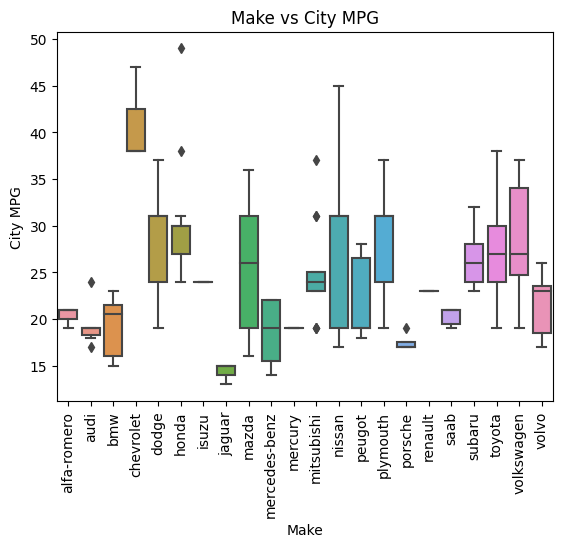

In [26]:
#Create a boxplot for Make Vs City MPG
sns.boxplot(data=df, x="make", y="city-mpg")
plt.title("Make vs City MPG")
plt.xlabel("Make")
plt.ylabel("City MPG")
plt.xticks(rotation=90)
plt.show()


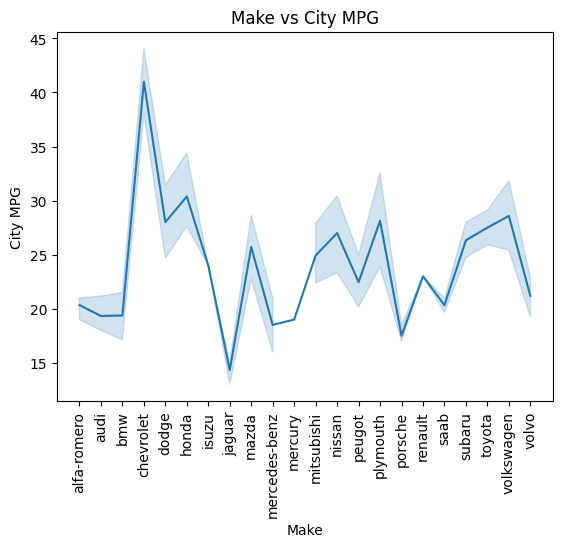

In [27]:
# Create a lineplot for Make Vs City MPG
sns.lineplot(data=df, x="make", y="city-mpg")
plt.title("Make vs City MPG")
plt.xlabel("Make")
plt.ylabel("City MPG")
plt.xticks(rotation=90)
plt.show()


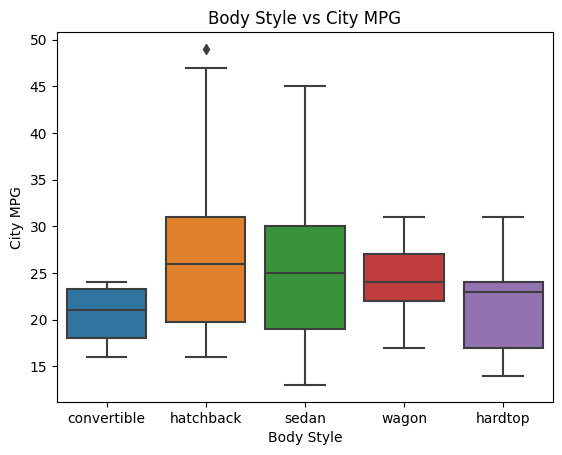

In [28]:
# Create a boxplot for Body style vs City MPG
sns.boxplot(data=df, x="body-style", y="city-mpg")
plt.title("Body Style vs City MPG")
plt.xlabel("Body Style")
plt.ylabel("City MPG")
plt.show()


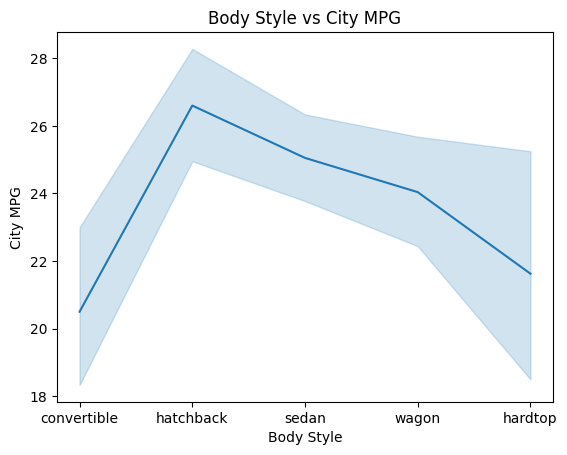

In [29]:
# Create a lineplot for Body style vs City MPG
sns.lineplot(data=df, x="body-style", y="city-mpg")
plt.title("Body Style vs City MPG")
plt.xlabel("Body Style")
plt.ylabel("City MPG")
plt.show()


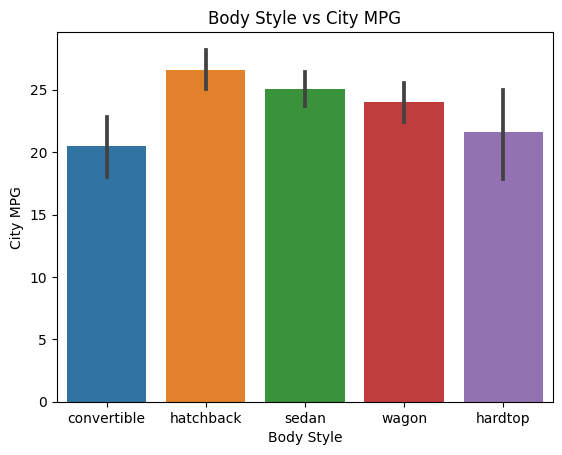

In [30]:
# Create a Barplot for Body style vs City MPG
sns.barplot(data=df, x="body-style", y="city-mpg")
plt.title("Body Style vs City MPG")
plt.xlabel("Body Style")
plt.ylabel("City MPG")
plt.show()


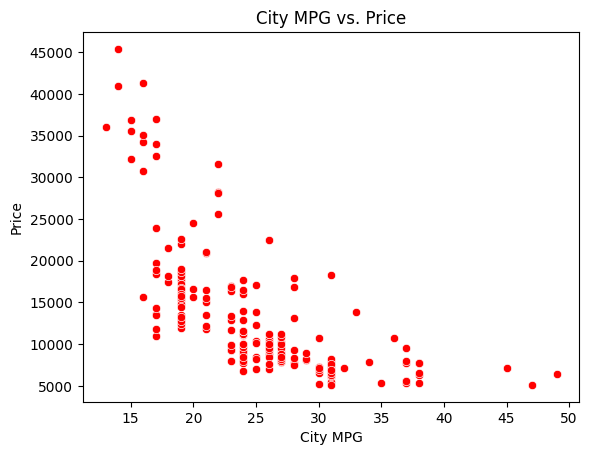

In [31]:
# Create a scatterplot for city mpg vs price
sns.scatterplot(data=df, x="city-mpg", y="price", color="red")
plt.title("City MPG vs. Price")
plt.xlabel("City MPG")
plt.ylabel("Price")
plt.show()



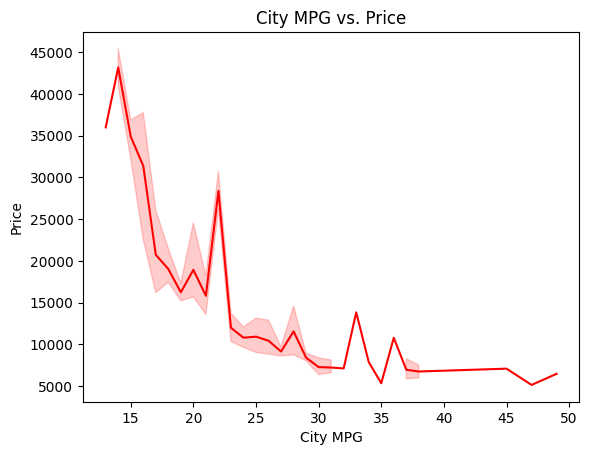

In [32]:
# Create a lineplot for city mpg vs price
sns.lineplot(data=df, x="city-mpg", y="price", color="red")
plt.title("City MPG vs. Price")
plt.xlabel("City MPG")
plt.ylabel("Price")
plt.show()

In [33]:
# Check for the correlation coefficient
corr_coeff = df["city-mpg"].corr(df["price"])

print(corr_coeff)

-0.686571006784468


# 3.Story

# 4. Conclusion